# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
is also called a visible layer, since we see and interact with it. This is a dataset we feed into Neural Networks. The input layer passes the data directly to the first hidden layer where the data is multiplied by the first hidden layer's weights. Also, The input layer might have its own weights that multiply the incoming data.

### Hidden Layer:
is a layer which transforms inputs from the previous layer into something that the output layer can use. A feed forward neural network applies a series of functions to the data. The exact function will depend on the neural network (for ex., it can be a linear transformation of the previous layer, followed by a squashing nonlinearity, or computing logical functions). This layer is responsible extracting the required features from the input data. 

### Output Layer:
The output layer of the neural network collects and transmits the information accordingly in way it has been designed to give. The pattern presented by the output layer can be directly traced back to the input layer. 

### Neuron:
or a perceptron, is a basic unit of a neural network, it has several inputs, for each input there is a weight (weight of that spesific connection). When the artifitial neuron activates, it computes its state, by adding all the incoming inputs multiplied by its corresponding connection weight. After computing its state the neuron passes it through its activation function, which normalizes the result. (between 0:1, -1:1, or only +). The neuron / perceptron consists of 4 parts:

Input values or One input layer

Weights and Bias

Net sum

Activation Function

### Weight:
refers to a strength or amplitude of a connection between two nodes (the amount of influence the firing of one neuron has on another). Also, the importance of an input.

### Activation Function:
The activation function is the non linear transformation that we do over the input signal. This transformed output is then sent to the next layer of neurons as input. There are several activation functions, such as sigmoid, tahn, relu, and others.

### Node Map:
is the number of layers and nodes in each layer in neural networks.

### Perceptron:
is a neuron, explained above


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?



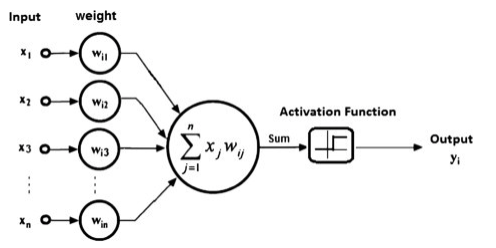

In [5]:
from IPython.display import Image
Image(filename="/Users/zarrina/Desktop/n.png")

#### Your Answer Here
The inputs x are multiplied by their weights w. All the values summed up, and activation function is applied to the sum. The resulting value is an input to the next layer, or is output.

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

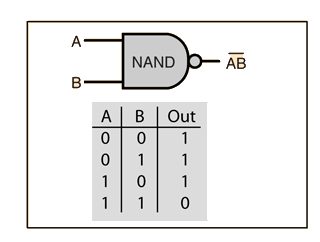

In [15]:
from IPython.display import Image
Image(filename="/Users/zarrina/Desktop/2.png")

Wx+b >= 0 ==> 1 

Wx+b <0  ==> 0

In [3]:
##### Your Code Here #####
import numpy as np
inputs = np.array([[1, 0,0], [1, 1,0], [1,0,1], [1,1,1]])
correct_outputs = [1,1,1,0]
weights = np.array([[1.5, -1, -1]])

def NAND(inputs, weights):
    y = np.dot(inputs, weights.T)
    outputs = [0 if val<=0 else 1 for val in y]
    return outputs 

outputs = NAND(inputs, weights)
outputs == correct_outputs

True

[Source Article for logic gates by perceptron]('https://schwalbe10.github.io/thinkage/2017/01/21/perceptron.html)

In [4]:
##### FOR REFERENCE, LOGIC GATES BY PERCEPTRON #####
import numpy as np

def AND(x1, x2):
    x = np.array([1, x1, x2])
    w = np.array([-1.5, 1, 1])
    y = np.sum(w*x)
    if y <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([1, x1, x2])
    w = np.array([-0.5, 1, 1])
    y = np.sum(w*x)
    if y <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([1, x1, x2])
    w = np.array([1.5, -1, -1])
    y = np.sum(w*x)
    if y <= 0:
        return 0
    else:
        return 1


if __name__ == '__main__':
    input = [(0, 0), (1, 0), (0, 1), (1, 1)]

    print("AND")
    for x in input:
        y = AND(x[0], x[1])
        print(str(x) + " -> " + str(y))

    print("OR")
    for x in input:
        y = OR(x[0], x[1])
        print(str(x) + " -> " + str(y))

    print("NAND")
    for x in input:
        y = NAND(x[0], x[1])
        print(str(x) + " -> " + str(y))    

AND
(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1
OR
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1
NAND
(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [12]:
#from scratch, Ryan's way
np.random.seed(1)

inputs = np.array([[0,0,1],
                   [1,0,1],
                   [0,1,1],
                   [1,1,1]])


correct_outputs = [[1],
                   [1],
                   [1],
                   [0]]

weights = 2 * np.random.random((3,1)) - 1

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

for iteration in range(10000):
  
    # Weighted sum of inputs and weights
    weighted_sum = np.dot(inputs, weights)

    # Activate with sigmoid function
    activated_output = sigmoid(weighted_sum)

    # Calculate Error
    error = correct_outputs - activated_output

    # Calculate weight adjustments with sigmoid_derivative
    adjustments = error * sigmoid_derivative(activated_output)

    # Update weights
    weights += np.dot(inputs.T, adjustments)
    
  
print('optimized weights after training: ')
print(weights)

print("Output After Training:")
print(activated_output)

optimized weights after training: 
[[-11.83844999]
 [-11.83844999]
 [ 17.80654007]]
Output After Training:
[[0.99999998]
 [0.99744715]
 [0.99744715]
 [0.0028142 ]]


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
titanic = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv')
titanic.drop(['deck', 'Unnamed: 0'], axis=1, inplace=True)
titanic.dropna()
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [80]:
titanic['is_female'] = titanic['who'] == 'woman'
X = titanic[titanic.columns[titanic.columns != 'survived']]
y = titanic[titanic.columns[titanic.columns == 'survived']]
print(X.shape)
print(y.shape)

(891, 14)
(891, 1)


In [79]:
##### Your Code Here #####
class Perceptron(object):

    def __init__(self, epochs=100, lr=0.01):
        self.epochs = epochs
        self.lr = lr
    
        
    def predict(self, inp):
        w_sum = np.dot(inp, self.weights[1:]) + self.weights[0]
        return 1.0 if w_sum >= 0.0 else 0.0    

    def train(self, train, labels):
        self.weights = [0.0 for i in range(train.shape[1] + 1)]
        print(self.weights)
        self.errors = []
        for epoch in range(self.epochs):
            sum_error = 0.0
            for inp, label in zip(train, labels):
                prediction = self.predict(inp)
                error = label - prediction
                sum_error += error**2
                self.weights[0] += self.lr * error
                self.weights[1:] += self.lr * error * inp
            self.errors.append(sum_error)    
        return self  
    
    
pn = Perceptron(100, .2)
pn.train(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()    

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?